/Users/adrianpawlowski/Documents/AITradingPlatform/ML/rl/../data_processing.py:209: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[features] = data[features].fillna(method='ffill').fillna(method='bfill').fillna(0)
2025-04-09 19:02:30.622949: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-04-09 19:02:30.622983: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-04-09 19:02:30.622993: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2025-04-09 19:02:30.623012: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-09 19:02:30.623031: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhos

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


2025-04-09 19:02:30.857544: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
/opt/anaconda3/envs/ml-trading-platform/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- JPM ---
Final Realized P/L: $1,883.31
Percent Gain: 18.83%
Annualized Gain: 14.82%
Final Balance: $11,883.31


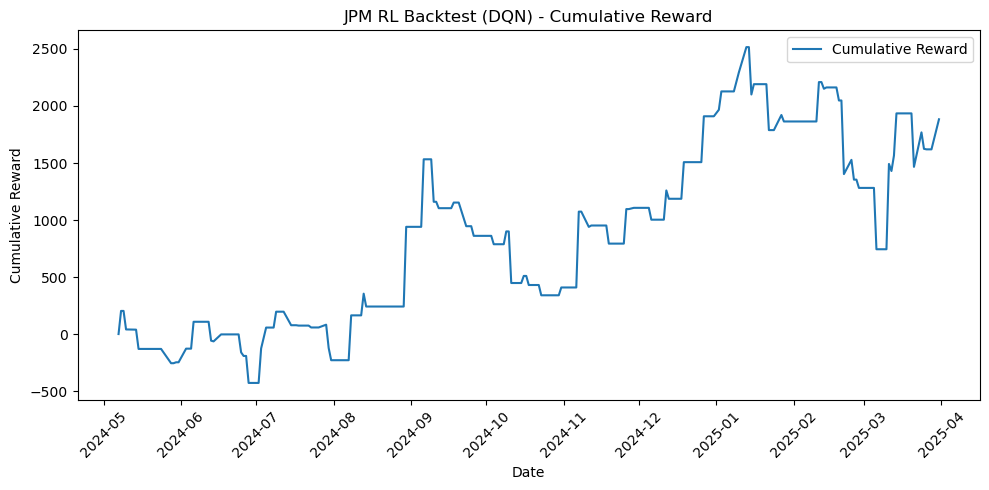

/Users/adrianpawlowski/Documents/AITradingPlatform/ML/rl/../data_processing.py:209: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[features] = data[features].fillna(method='ffill').fillna(method='bfill').fillna(0)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/opt/anaconda3/envs/ml-trading-platform/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- KO ---
Final Realized P/L: $-975.83
Percent Gain: -9.76%
Annualized Gain: -7.90%
Final Balance: $9,024.17


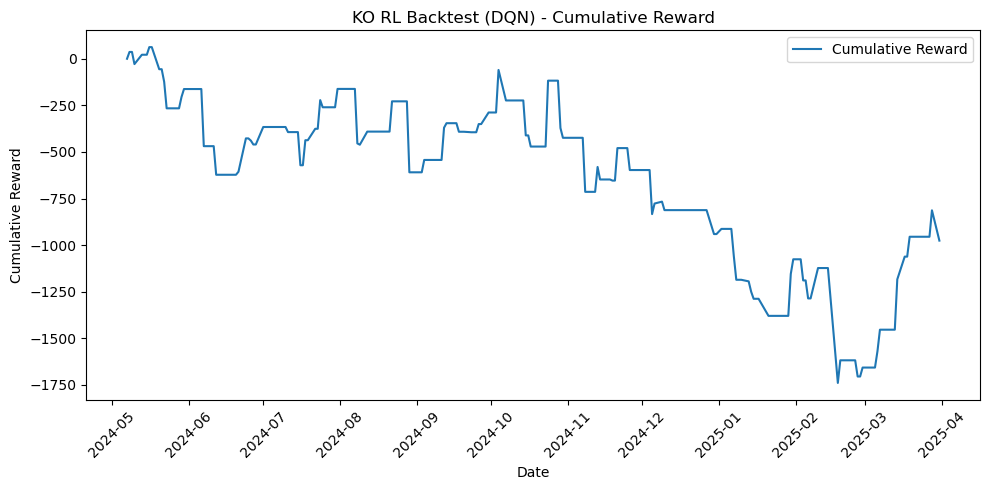

/Users/adrianpawlowski/Documents/AITradingPlatform/ML/rl/../data_processing.py:209: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[features] = data[features].fillna(method='ffill').fillna(method='bfill').fillna(0)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/opt/anaconda3/envs/ml-trading-platform/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- LMT ---
Final Realized P/L: $-432.55
Percent Gain: -4.33%
Annualized Gain: -3.48%
Final Balance: $9,567.45


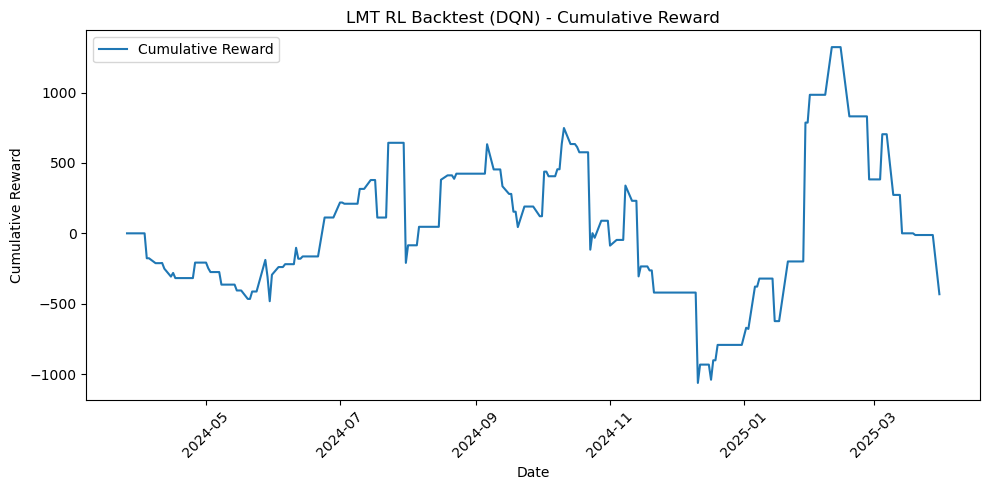

/Users/adrianpawlowski/Documents/AITradingPlatform/ML/rl/../data_processing.py:209: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[features] = data[features].fillna(method='ffill').fillna(method='bfill').fillna(0)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/opt/anaconda3/envs/ml-trading-platform/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- JNJ ---
Final Realized P/L: $713.00
Percent Gain: 7.13%
Annualized Gain: 5.67%
Final Balance: $10,713.00


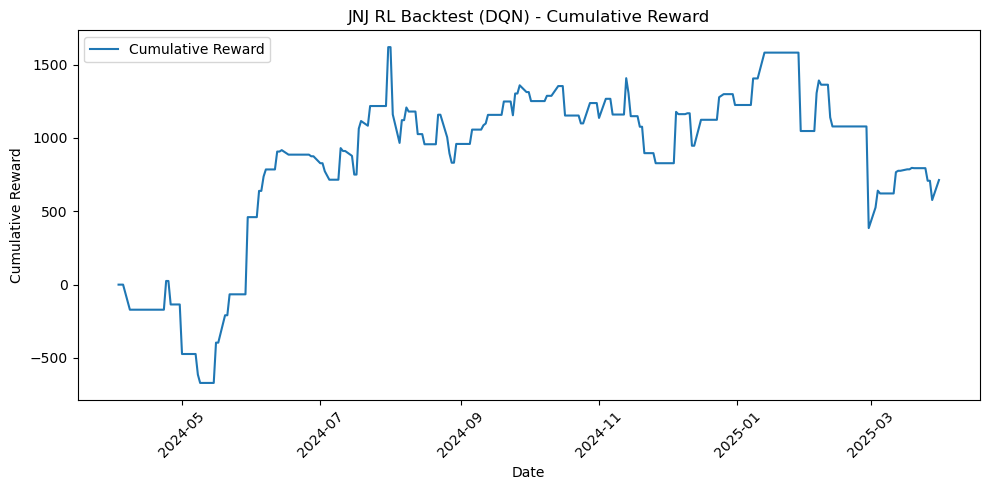

/Users/adrianpawlowski/Documents/AITradingPlatform/ML/rl/../data_processing.py:209: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[features] = data[features].fillna(method='ffill').fillna(method='bfill').fillna(0)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/opt/anaconda3/envs/ml-trading-platform/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- NKE ---
Final Realized P/L: $2,677.45
Percent Gain: 26.77%
Annualized Gain: 20.93%
Final Balance: $12,677.45


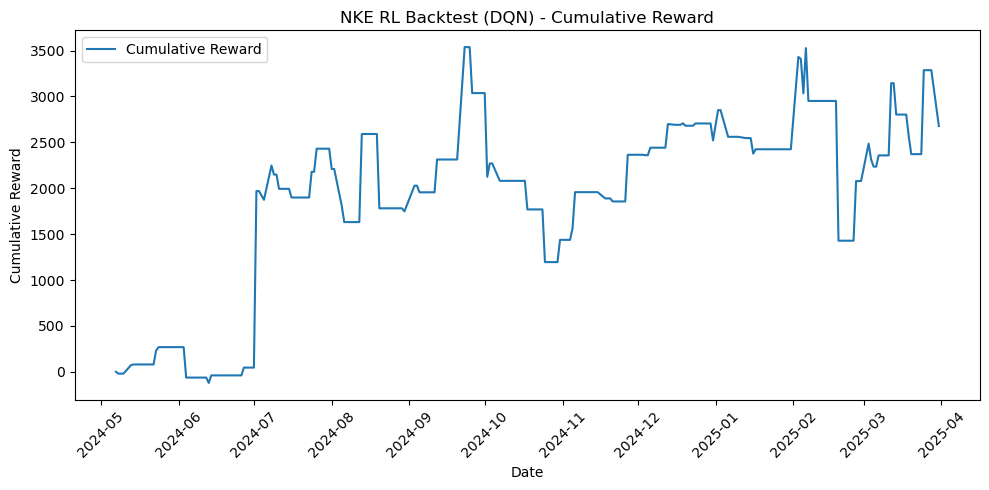

/Users/adrianpawlowski/Documents/AITradingPlatform/ML/rl/../data_processing.py:209: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[features] = data[features].fillna(method='ffill').fillna(method='bfill').fillna(0)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/opt/anaconda3/envs/ml-trading-platform/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- TSLA ---
Final Realized P/L: $473.56
Percent Gain: 4.74%
Annualized Gain: 3.78%
Final Balance: $10,473.56


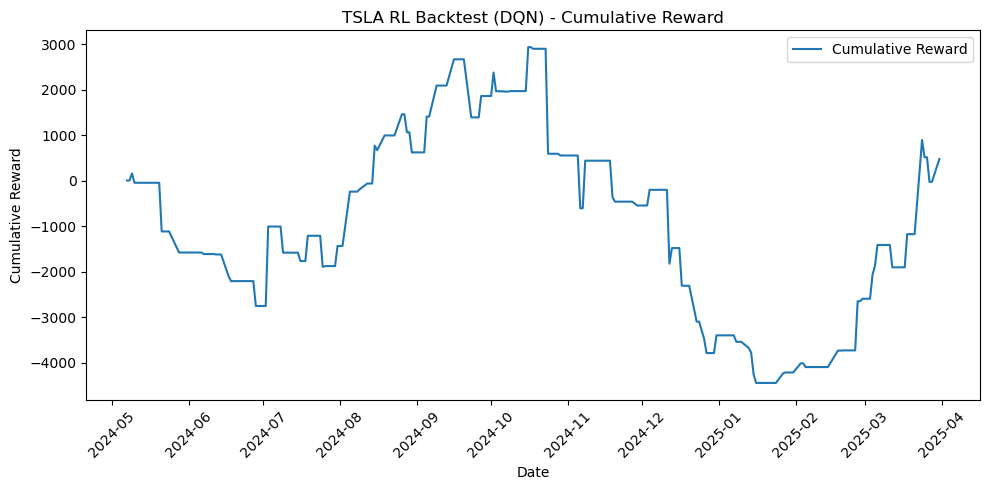


===== PORTFOLIO AGGREGATE =====
Number of Tickers: 6
Initial Total Portfolio: $60,000.00
Final Total Portfolio:   $60,473.56
Total Profit:           $473.56
Percent Gain:           0.79%
Annualized Gain:        0.63%


In [1]:
from run_trained_agent import run_trained_agent_on_data

# ----------------------------------------
# 1. Define parameters
# ----------------------------------------
tickers = ['JPM', 'KO', 'LMT', 'JNJ', 'NKE', 'TSLA']
start_date = "2024-01-01"
end_date = "2025-04-01"
api_key = 'NL9PDOM5JWRPAT9O'  # 🔐 Replace with your actual key

# ----------------------------------------
# 2. Define model paths and feature subsets for each ticker
# ----------------------------------------
feature_subset_KO = [
    'WCLPRICE', 'BB_lower', 'APO', 'MEDPRICE', 'HT_DCPERIOD', 'TYPPRICE',
    'TRIMA', 'MACD_hist', 'T3', 'SMA', 'AVGPRICE', 'TRANGE', 'ADXR',
    'HT_TRENDMODE', 'STOCH_fastk', 'STOCH_slowk', 'STOCH_slowd', 'TEMA',
    'CMO', 'STOCH_fastd', 'HT_DCPHASE', 'AROON_DOWN', 'CCI', 'MFI', 'OBV',
    'MACD_signal', 'MINUS_DI', 'HT_LEADSINE', 'HT_PHASOR_inphase', 'WMA'
]

feature_subset_JPM = [
    'WMA', 'HT_DCPHASE', 'STOCH_fastd', 'AROON_UP', 'TEMA', 'HT_PHASOR_quadrature', 'WCLPRICE', 'NATR',
    'ADXR', 'TYPPRICE', 'MIDPRICE', 'TRANGE', 'MACD', 'MACD_hist', 'AROONOSC', 'ADOSC', 'CMO', 'AVGPRICE',
    'ROC', 'STOCH_slowk', 'TRIMA', 'MIDPOINT', 'STOCH_slowd', 'MFI', 'STOCH_fastk'
]

feature_subset_LMT = [
    'NATR', 'STOCH_fastd', 'MOM', 'HT_PHASOR_quadrature', 'MFI', 'RSI', 'AROON_DOWN', 'STOCH_slowd',
    'MACD_signal', 'TRANGE', 'DEMA', 'BB_middle', 'SMA', 'OBV', 'MIDPRICE', 'WMA', 'STOCH_fastk', 'BB_upper',
    'ADOSC', 'AD', 'CCI', 'HT_DCPERIOD', 'ADX', 'STOCH_slowk', 'MINUS_DI', 'T3'
]

feature_subset_JNJ = ['HT_DCPERIOD', 'MEDPRICE', 'HT_DCPHASE', 'MACD_signal', 'HT_TRENDMODE', 'STOCH_fastd', 'AROON_UP',
             'HT_SINE', 'MINUS_DM', 'HT_PHASOR_quadrature', 'BB_middle', 'NATR', 'ADXR', 'TYPPRICE', 'MIDPRICE', 'RSI',
             'BB_lower', 'AROONOSC', 'AROON_DOWN', 'ADOSC', 'DEMA', 'PLUS_DM', 'CMO', 'AVGPRICE', 'MOM', 'ROC',
             'STOCH_slowk', 'TRIMA', 'T3', 'MIDPOINT', 'SMA', 'CCI', 'STOCH_fastk']

feature_subset_NKE = ['NATR', 'HT_DCPHASE', 'APO', 'CMO', 'HT_TRENDMODE', 'STOCH_fastd', 'MIDPOINT', 'MACD',
             'HT_PHASOR_quadrature', 'MFI', 'AROON_UP', 'RSI', 'AROON_DOWN', 'AROONOSC', 'STOCH_slowd', 'TRANGE',
             'SMA', 'TEMA', 'HT_SINE', 'PLUS_DI', 'BB_lower', 'STOCH_fastk', 'MIDPRICE', 'BB_upper', 'ADX',
             'STOCH_slowk', 'MEDPRICE', 'MINUS_DI']

feature_subset_TSLA = ['WCLPRICE', 'AROON_UP', 'MIDPOINT', 'TYPPRICE', 'MACD', 'BB_upper', 'MACD_hist', 'T3', 'ADX', 'SMA',
             'PLUS_DI', 'STOCH_fastk', 'MINUS_DM', 'TEMA', 'ATR', 'STOCH_fastd', 'AROON_DOWN', 'BB_middle', 'NATR',
             'HT_LEADSINE', 'MFI', 'OBV', 'HT_PHASOR_inphase', 'STOCH_slowd']


results_dict = {}
portfolio_profit = 0.0
# ----------------------------------------
# 3. Loop over each ticker and call run_trained_agent_on_data
# ----------------------------------------
for ticker in tickers:
    if ticker == 'KO':
        dqn_model_path = "../models/rl/ko_dqn_model_both.h5"
        xgb_model_path = "../models/boost/xgboost_KO.joblib"
        lstm_model_path = "../models/lstm/lstm_KO_model.h5"
        feature_subset = feature_subset_KO
    elif ticker == 'JPM':
        # Replace these with the actual JPM model paths you have
        dqn_model_path = "../models/rl/jpm_dqn_model_both.h5"
        xgb_model_path = "../models/boost/xgboost_JPM.joblib"
        lstm_model_path = "../models/lstm/lstm_JPM_model.h5"
        feature_subset = feature_subset_JPM
    elif ticker == 'LMT':
        # Replace these with the actual LMT model paths you have
        dqn_model_path = "../models/rl/lmt_dqn_model_both.h5"
        xgb_model_path = "../models/boost/xgboost_LMT.joblib"
        lstm_model_path = "../models/lstm/lstm_LMT_model.h5"
        feature_subset = feature_subset_LMT
    elif ticker == 'NKE':
        # Replace these with the actual LMT model paths you have
        dqn_model_path = "../models/rl/nke_dqn_model_both.h5"
        xgb_model_path = "../models/boost/xgboost_NKE.joblib"
        lstm_model_path = "../models/lstm/lstm_NKE_model.h5"
        feature_subset = feature_subset_NKE
    elif ticker == 'JNJ':
        # Replace these with the actual LMT model paths you have
        dqn_model_path = "../models/rl/jnj_dqn_model_both.h5"
        xgb_model_path = "../models/boost/xgboost_JNJ.joblib"
        lstm_model_path = "../models/lstm/lstm_JNJ_model.h5"
        feature_subset = feature_subset_JNJ
    elif ticker == 'TSLA':
        # Replace these with the actual LMT model paths you have
        dqn_model_path = "../models/rl/tsla_dqn_model_both.h5"
        xgb_model_path = "../models/boost/xgboost_TSLA.joblib"
        lstm_model_path = "../models/lstm/lstm_TSLA_model.h5"
        feature_subset = feature_subset_TSLA

    # Run your trained agent on the current ticker
    df_results, summary = run_trained_agent_on_data(
        ticker=ticker,
        start_date=start_date,
        end_date=end_date,
        api_key=api_key,
        dqn_model_path=dqn_model_path,
        xgb_model_path=xgb_model_path,
        lstm_model_path=lstm_model_path,
        xgb_features=feature_subset,
        plot=True,
        initial_balance=10_000  # or whatever your env is using
    )

    # Optionally, do something with df_results here
    # e.g., save to CSV:
    # df_results.to_csv(f"{ticker}_results.csv", index=False)

results_dict[ticker] = summary
    # Add the final profit to the "portfolio" total
portfolio_profit += summary["final_profit"]

    # (Optionally save or analyze df_results)
    # df_results.to_csv(f"{ticker}_results.csv", index=False)

# ----------------------------------------------------------------
# 3) Compute Portfolio-Wide Performance
# ----------------------------------------------------------------
# We'll assume each ticker is traded independently, each with initial_balance=100k
# If you truly want to treat them as a single "pooled" account, you might adjust logic.
import math
import pandas as pd
num_tickers = len(tickers)
total_initial = 10_000 * num_tickers
portfolio_final = total_initial + portfolio_profit
raw_portfolio_gain = portfolio_profit / total_initial  # (final - initial) / initial
portfolio_percent_gain = raw_portfolio_gain * 100

# Same annualized calculation
from datetime import datetime
start_dt = pd.to_datetime(start_date)
end_dt = pd.to_datetime(end_date)
days_diff = (end_dt - start_dt).days
years_diff = days_diff / 365.25 if days_diff > 0 else 1.0

if raw_portfolio_gain > -1:
    portfolio_annualized_gain = ((1 + raw_portfolio_gain) ** (1 / years_diff) - 1) * 100
else:
    portfolio_annualized_gain = -100.0  # or something to indicate big losses

print("\n===== PORTFOLIO AGGREGATE =====")
print(f"Number of Tickers: {num_tickers}")
print(f"Initial Total Portfolio: ${total_initial:,.2f}")
print(f"Final Total Portfolio:   ${portfolio_final:,.2f}")
print(f"Total Profit:           ${portfolio_profit:,.2f}")
print(f"Percent Gain:           {portfolio_percent_gain:.2f}%")
print(f"Annualized Gain:        {portfolio_annualized_gain:.2f}%")


In [ ]:
from run_trained_agent import run_trained_agent_on_data_long

# ----------------------------------------
# 1. Define parameters
# ----------------------------------------
tickers = ['JNJ', 'JPM', 'KO']
start_date = "2024-01-01"
end_date = "2025-04-01"
api_key = 'NL9PDOM5JWRPAT9O'  # 🔐 Replace with your actual key

# ----------------------------------------
# 2. Define model paths and feature subsets for each ticker
# ----------------------------------------
feature_subset_KO = [
    'WCLPRICE', 'BB_lower', 'APO', 'MEDPRICE', 'HT_DCPERIOD', 'TYPPRICE',
    'TRIMA', 'MACD_hist', 'T3', 'SMA', 'AVGPRICE', 'TRANGE', 'ADXR',
    'HT_TRENDMODE', 'STOCH_fastk', 'STOCH_slowk', 'STOCH_slowd', 'TEMA',
    'CMO', 'STOCH_fastd', 'HT_DCPHASE', 'AROON_DOWN', 'CCI', 'MFI', 'OBV',
    'MACD_signal', 'MINUS_DI', 'HT_LEADSINE', 'HT_PHASOR_inphase', 'WMA'
]

feature_subset_JPM = [
    'WMA', 'HT_DCPHASE', 'STOCH_fastd', 'AROON_UP', 'TEMA', 'HT_PHASOR_quadrature', 'WCLPRICE', 'NATR',
    'ADXR', 'TYPPRICE', 'MIDPRICE', 'TRANGE', 'MACD', 'MACD_hist', 'AROONOSC', 'ADOSC', 'CMO', 'AVGPRICE',
    'ROC', 'STOCH_slowk', 'TRIMA', 'MIDPOINT', 'STOCH_slowd', 'MFI', 'STOCH_fastk'
]

feature_subset_LMT = [
    'NATR', 'STOCH_fastd', 'MOM', 'HT_PHASOR_quadrature', 'MFI', 'RSI', 'AROON_DOWN', 'STOCH_slowd',
    'MACD_signal', 'TRANGE', 'DEMA', 'BB_middle', 'SMA', 'OBV', 'MIDPRICE', 'WMA', 'STOCH_fastk', 'BB_upper',
    'ADOSC', 'AD', 'CCI', 'HT_DCPERIOD', 'ADX', 'STOCH_slowk', 'MINUS_DI', 'T3'
]

feature_subset_JNJ = ['HT_DCPERIOD', 'MEDPRICE', 'HT_DCPHASE', 'MACD_signal', 'HT_TRENDMODE', 'STOCH_fastd', 'AROON_UP',
             'HT_SINE', 'MINUS_DM', 'HT_PHASOR_quadrature', 'BB_middle', 'NATR', 'ADXR', 'TYPPRICE', 'MIDPRICE', 'RSI',
             'BB_lower', 'AROONOSC', 'AROON_DOWN', 'ADOSC', 'DEMA', 'PLUS_DM', 'CMO', 'AVGPRICE', 'MOM', 'ROC',
             'STOCH_slowk', 'TRIMA', 'T3', 'MIDPOINT', 'SMA', 'CCI', 'STOCH_fastk']

feature_subset_NKE = ['NATR', 'HT_DCPHASE', 'APO', 'CMO', 'HT_TRENDMODE', 'STOCH_fastd', 'MIDPOINT', 'MACD',
             'HT_PHASOR_quadrature', 'MFI', 'AROON_UP', 'RSI', 'AROON_DOWN', 'AROONOSC', 'STOCH_slowd', 'TRANGE',
             'SMA', 'TEMA', 'HT_SINE', 'PLUS_DI', 'BB_lower', 'STOCH_fastk', 'MIDPRICE', 'BB_upper', 'ADX',
             'STOCH_slowk', 'MEDPRICE', 'MINUS_DI']

feature_subset_TSLA = ['WCLPRICE', 'AROON_UP', 'MIDPOINT', 'TYPPRICE', 'MACD', 'BB_upper', 'MACD_hist', 'T3', 'ADX', 'SMA',
             'PLUS_DI', 'STOCH_fastk', 'MINUS_DM', 'TEMA', 'ATR', 'STOCH_fastd', 'AROON_DOWN', 'BB_middle', 'NATR',
             'HT_LEADSINE', 'MFI', 'OBV', 'HT_PHASOR_inphase', 'STOCH_slowd']


results_dict = {}
portfolio_profit = 0.0
# ----------------------------------------
# 3. Loop over each ticker and call run_trained_agent_on_data
# ----------------------------------------
for ticker in tickers:
    if ticker == 'KO':
        dqn_model_path = "../models/rl/ko_dqn_model_long.h5"
        xgb_model_path = "../models/boost/xgboost_KO.joblib"
        lstm_model_path = "../models/lstm/lstm_KO_model.h5"
        feature_subset = feature_subset_KO
    elif ticker == 'JPM':
        # Replace these with the actual JPM model paths you have
        dqn_model_path = "../models/rl/jpm_dqn_model_long.h5"
        xgb_model_path = "../models/boost/xgboost_JPM.joblib"
        lstm_model_path = "../models/lstm/lstm_JPM_model.h5"
        feature_subset = feature_subset_JPM
    elif ticker == 'LMT':
        # Replace these with the actual LMT model paths you have
        dqn_model_path = "../models/rl/lmt_dqn_model_both.h5"
        xgb_model_path = "../models/boost/xgboost_LMT.joblib"
        lstm_model_path = "../models/lstm/lstm_LMT_model.h5"
        feature_subset = feature_subset_LMT
    elif ticker == 'NKE':
        # Replace these with the actual LMT model paths you have
        dqn_model_path = "../models/rl/nke_dqn_model_both.h5"
        xgb_model_path = "../models/boost/xgboost_NKE.joblib"
        lstm_model_path = "../models/lstm/lstm_NKE_model.h5"
        feature_subset = feature_subset_NKE
    elif ticker == 'JNJ':
        # Replace these with the actual LMT model paths you have
        dqn_model_path = "../models/rl/jnj_dqn_model_long.h5"
        xgb_model_path = "../models/boost/xgboost_JNJ.joblib"
        lstm_model_path = "../models/lstm/lstm_JNJ_model.h5"
        feature_subset = feature_subset_JNJ
    elif ticker == 'TSLA':
        # Replace these with the actual LMT model paths you have
        dqn_model_path = "../models/rl/tsla_dqn_model_both.h5"
        xgb_model_path = "../models/boost/xgboost_TSLA.joblib"
        lstm_model_path = "../models/lstm/lstm_TSLA_model.h5"
        feature_subset = feature_subset_TSLA

    # Run your trained agent on the current ticker
    df_results, summary = run_trained_agent_on_data_long(
        ticker=ticker,
        start_date=start_date,
        end_date=end_date,
        api_key=api_key,
        dqn_model_path=dqn_model_path,
        xgb_model_path=xgb_model_path,
        lstm_model_path=lstm_model_path,
        xgb_features=feature_subset,
        plot=True,
        initial_balance=10_000  # or whatever your env is using
    )

    # Optionally, do something with df_results here
    # e.g., save to CSV:
    # df_results.to_csv(f"{ticker}_results.csv", index=False)

results_dict[ticker] = summary
    # Add the final profit to the "portfolio" total
portfolio_profit += summary["final_profit"]

    # (Optionally save or analyze df_results)
    # df_results.to_csv(f"{ticker}_results.csv", index=False)

# ----------------------------------------------------------------
# 3) Compute Portfolio-Wide Performance
# ----------------------------------------------------------------
# We'll assume each ticker is traded independently, each with initial_balance=100k
# If you truly want to treat them as a single "pooled" account, you might adjust logic.
import math
import pandas as pd
num_tickers = len(tickers)
total_initial = 10_000 * num_tickers
portfolio_final = total_initial + portfolio_profit
raw_portfolio_gain = portfolio_profit / total_initial  # (final - initial) / initial
portfolio_percent_gain = raw_portfolio_gain * 100

# Same annualized calculation
from datetime import datetime
start_dt = pd.to_datetime(start_date)
end_dt = pd.to_datetime(end_date)
days_diff = (end_dt - start_dt).days
years_diff = days_diff / 365.25 if days_diff > 0 else 1.0

if raw_portfolio_gain > -1:
    portfolio_annualized_gain = ((1 + raw_portfolio_gain) ** (1 / years_diff) - 1) * 100
else:
    portfolio_annualized_gain = -100.0  # or something to indicate big losses

print("\n===== PORTFOLIO AGGREGATE =====")
print(f"Number of Tickers: {num_tickers}")
print(f"Initial Total Portfolio: ${total_initial:,.2f}")
print(f"Final Total Portfolio:   ${portfolio_final:,.2f}")
print(f"Total Profit:           ${portfolio_profit:,.2f}")
print(f"Percent Gain:           {portfolio_percent_gain:.2f}%")
print(f"Annualized Gain:        {portfolio_annualized_gain:.2f}%")
